In [1]:
# System operations
import inspect
import os
import uuid

# Date and time
from datetime import datetime

# type hinting
from typing import Any, List, Mapping, Tuple, Union

# Data visualization
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter, DayLocator
import seaborn as sns

# User interaction
from IPython.display import clear_output
from ipywidgets import Button, FloatSlider, HBox, HTML
from ipywidgets import IntProgress, Text, VBox

# Data manipulation
import math
import numpy as np
import pandas as pd
import gym
from gym import spaces
import random
import simplejson as json

# CityLearn
from citylearn.agents.rbc import HourRBC
from citylearn.agents.q_learning import TabularQLearning
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
from citylearn.reward_function import RewardFunction
from citylearn.wrappers import NormalizedObservationWrapper
from citylearn.wrappers import StableBaselines3Wrapper
from citylearn.wrappers import TabularQLearningWrapper

# baseline RL algorithms
from stable_baselines3 import SAC
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.vec_env import DummyVecEnv


Couldn't import dot_parser, loading of dot files will not be possible.


2025-10-23 15:52:04.390532: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-23 15:52:04.404224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761227524.417614 3217909 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761227524.421935 3217909 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761227524.433519 3217909 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
%matplotlib inline

In [3]:
DATASET_NAME = 'citylearn_challenge_2023_phase_3_1'
schema = DataSet().get_schema(DATASET_NAME)

INFO:root:Go here /home/iai/cj9272/.cache/citylearn/v2.4.1/datasets/citylearn_challenge_2023_phase_3_1/schema.json 


In [4]:
root_directory = schema['root_directory']

building_name = 'Building_1'

filename = schema['buildings'][building_name]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
display(building_data.head())
display(building_data.describe(include='all'))
# 2208 entries = 24 hours * 30,67 days * 3 months
# months: 6, 7, 8 = June, July, August
# hours: 1, 2, ..., 24

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_cooling_set_point,indoor_dry_bulb_temperature_heating_set_point,hvac_mode
0,6,1,2,0,22.428127,-0.794095,78.008000,0.356269,0.055730,0.000000,0.0,0.0,3.0,23.222221,23.222221,1
1,6,2,2,0,22.223213,0.000992,79.042720,0.344522,0.159217,0.227737,0.0,0.0,3.0,22.222221,22.222221,1
2,6,3,2,0,22.222225,0.000004,79.337524,0.338227,0.056899,0.132294,0.0,0.0,3.0,22.222221,22.222221,1
3,6,4,2,0,22.222227,0.000004,79.581154,0.334329,0.000000,0.152979,0.0,0.0,3.0,22.222221,22.222221,1
4,6,5,2,0,22.222225,0.000003,79.783520,0.348094,0.000000,0.119001,0.0,0.0,3.0,22.222221,22.222221,1


,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_cooling_set_point,indoor_dry_bulb_temperature_heating_set_point,hvac_mode
count,2208.000000,2208.000000,2208.000000,2208.0,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.0,2208.000000,2208.000000,2208.000000,2208.000000,2208.0
mean,7.010870,12.500000,3.978261,0.0,24.127535,-0.018776,59.200654,0.611653,0.203282,2.832108,0.0,181.965620,2.285326,24.146312,24.146312,1.0
std,0.814387,6.923755,2.000335,0.0,1.210651,0.171864,4.966167,0.814862,0.438131,1.643799,0.0,228.982415,0.846712,1.219651,1.219651,0.0
min,6.000000,1.000000,1.000000,0.0,20.000008,-2.543717,45.069614,0.308113,0.000000,0.000000,0.0,0.000000,0.000000,20.000000,20.000000,1.0
25%,6.000000,6.750000,2.000000,0.0,23.333403,-0.000026,56.135186,0.354607,0.000000,1.775248,0.0,0.000000,2.000000,23.333334,23.333334,1.0
50%,7.000000,12.500000,4.000000,0.0,24.444372,0.000007,58.611240,0.403186,0.000000,2.550615,0.0,27.846773,3.000000,24.444445,24.444445,1.0
75%,8.000000,18.250000,6.000000,0.0,24.444454,0.000090,61.912185,0.522546,0.203143,3.610280,0.0,388.286163,3.000000,24.444445,24.444445,1.0
max,8.000000,24.000000,7.000000,0.0,27.222277,0.172056,80.558754,7.458969,4.529509,10.852755,0.0,712.919250,3.000000,27.222221,27.222221,1.0


/scratch/slurm_tmpdir/job_1561869/ipykernel_3217909/885491455.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(


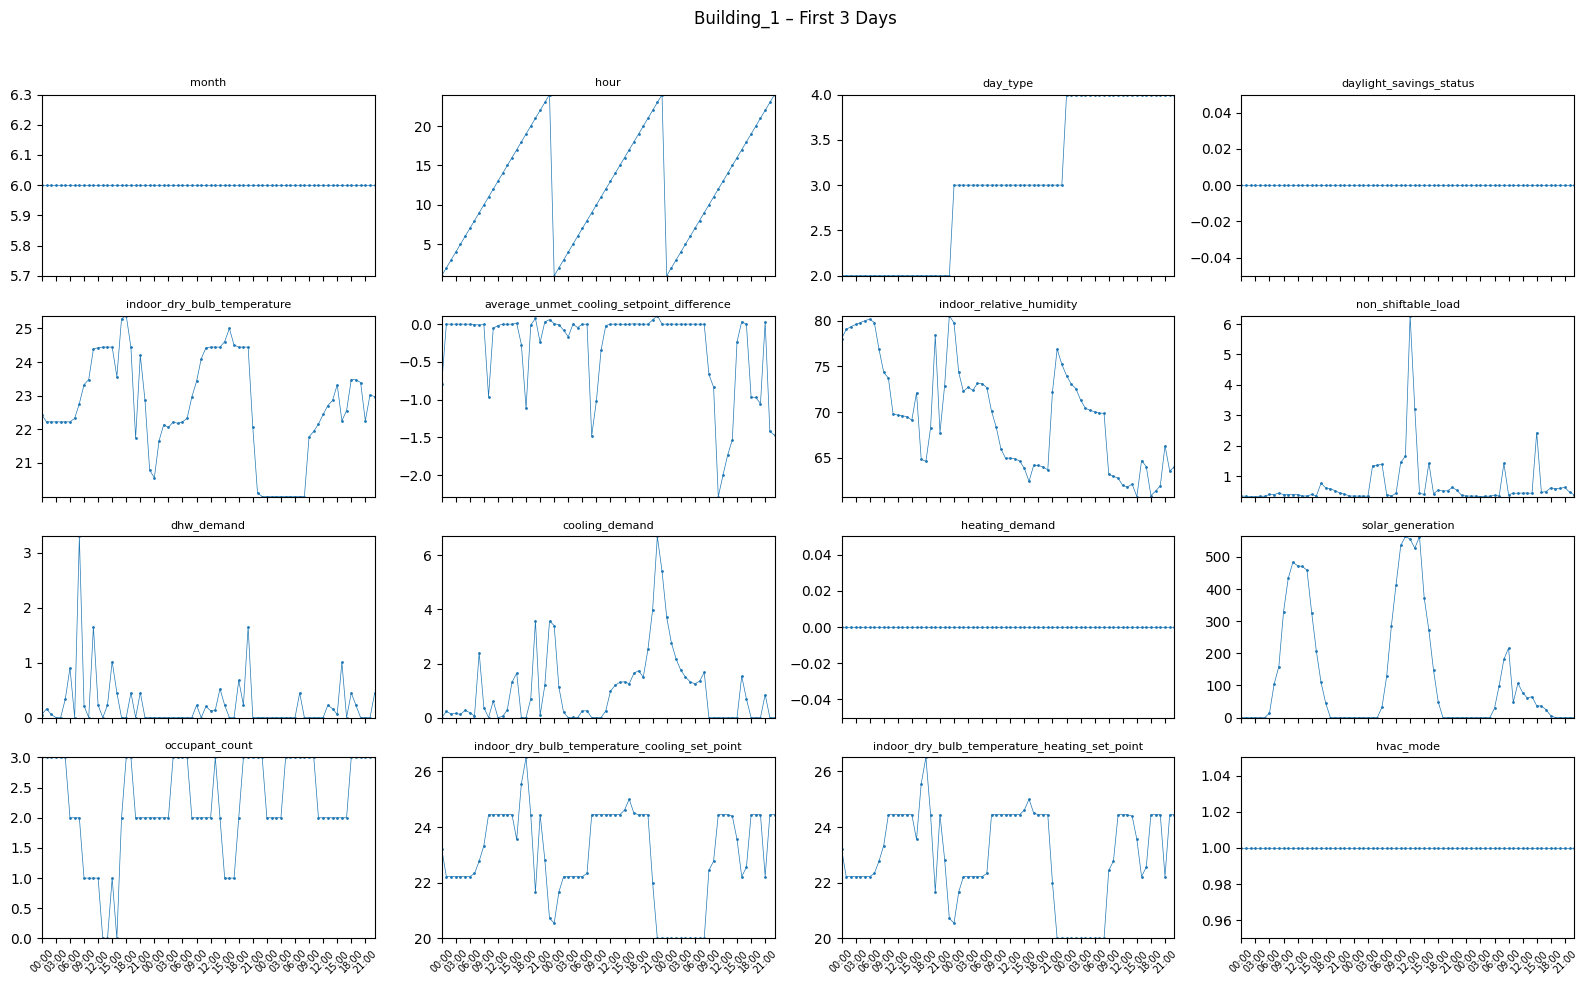

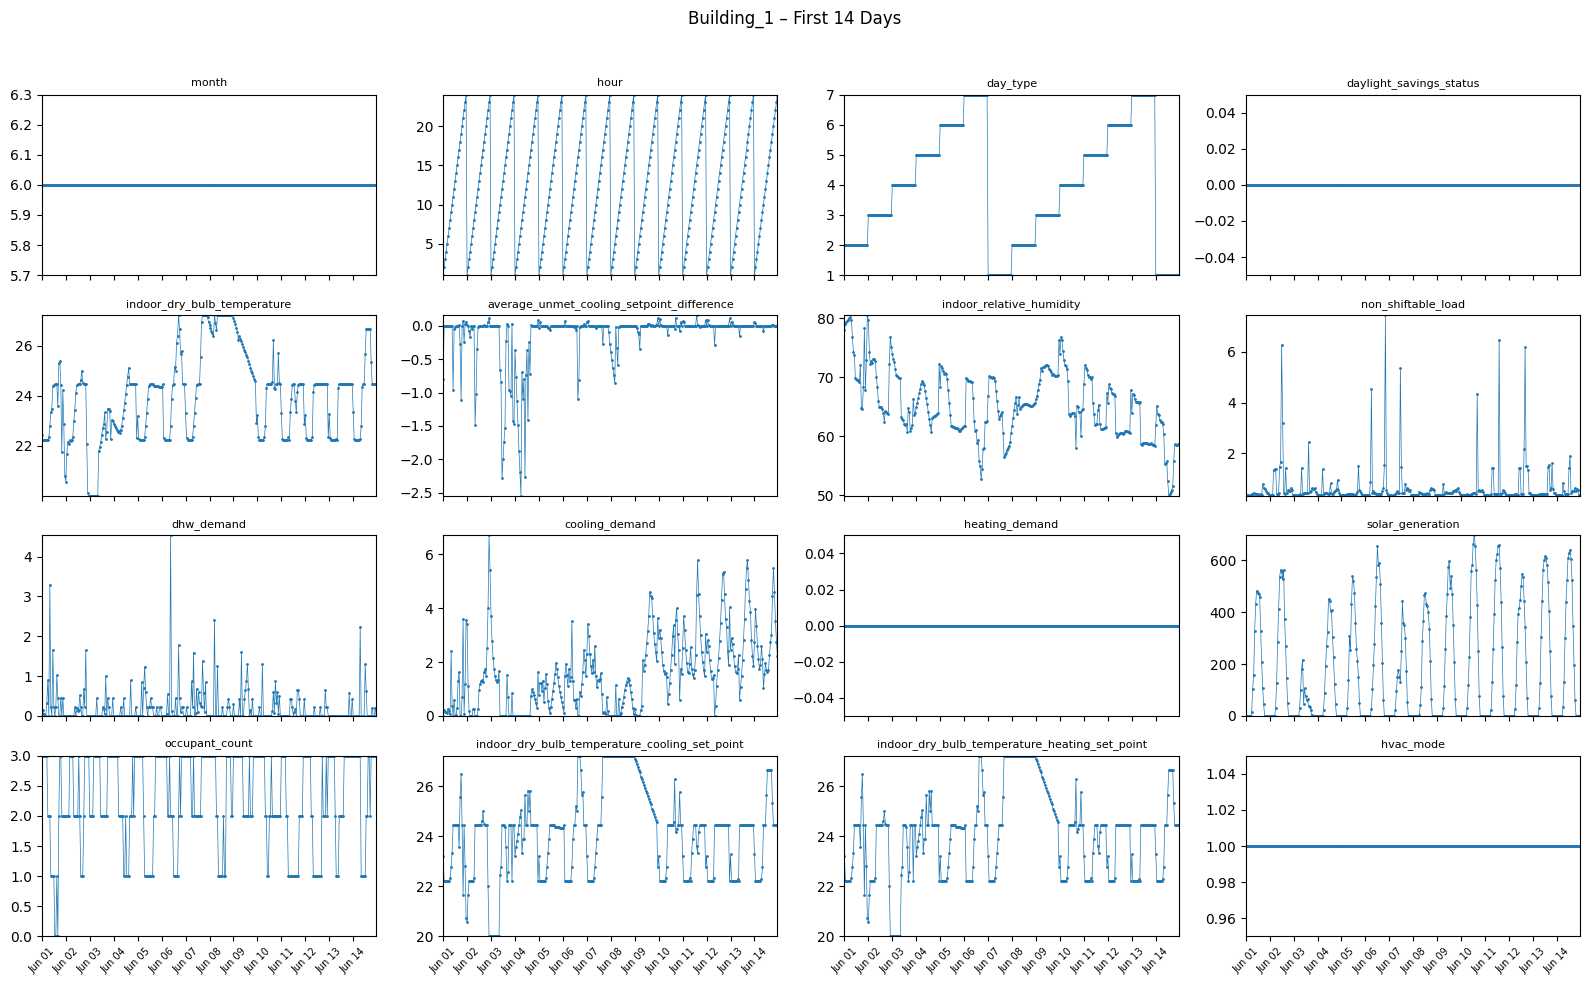

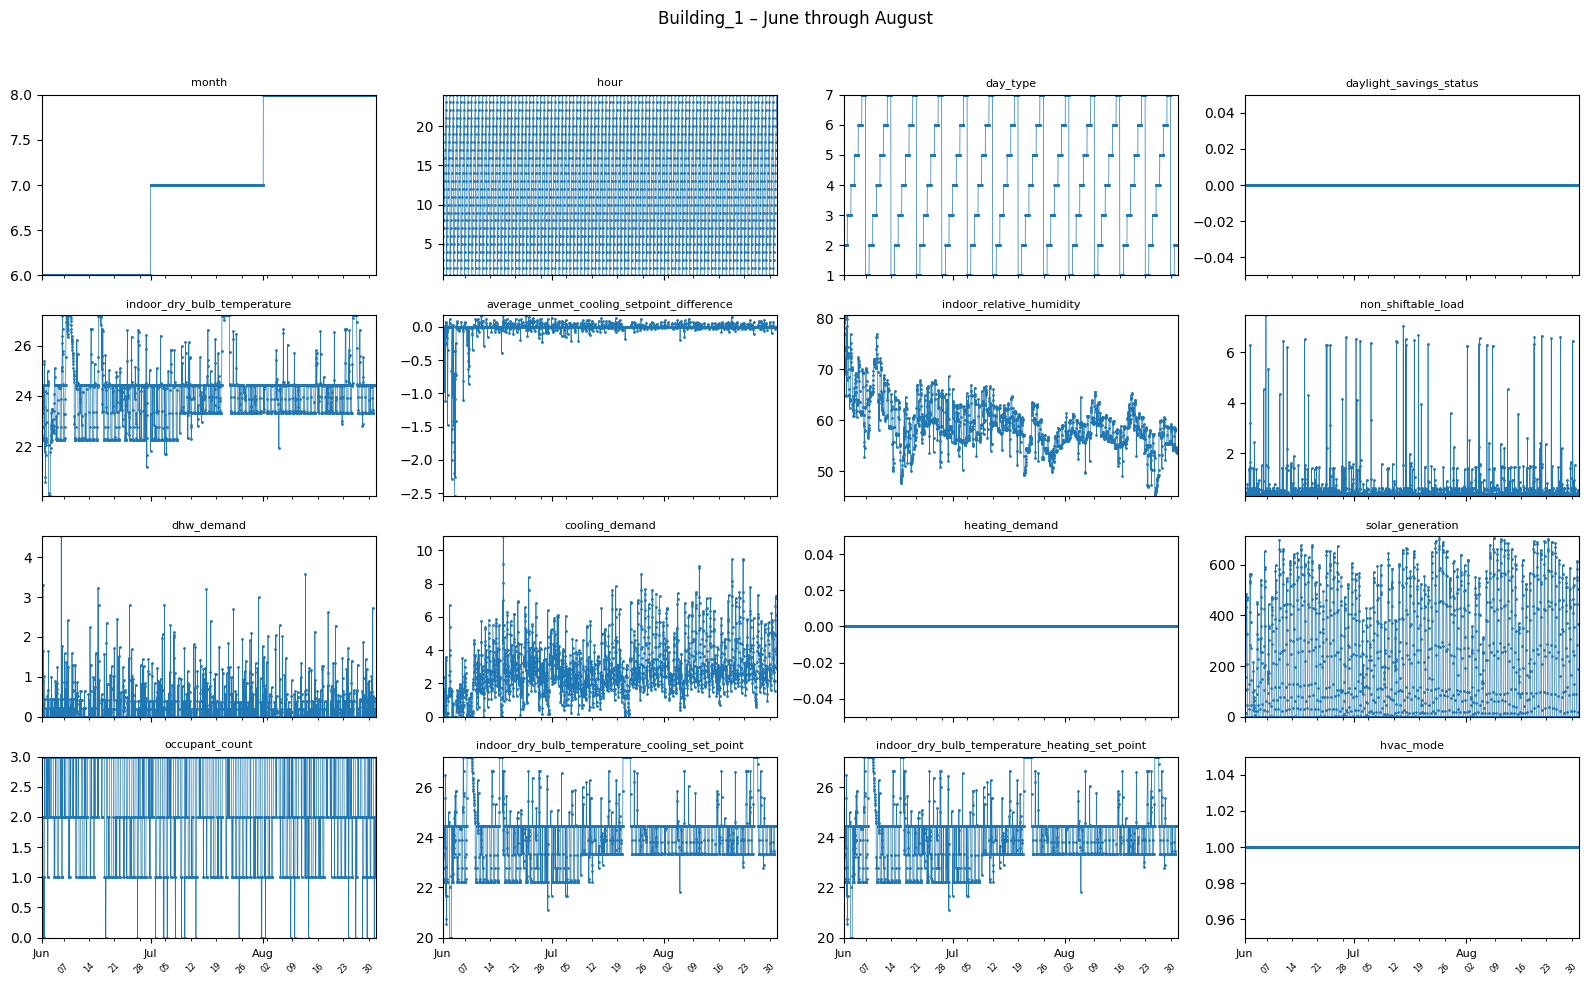

'Building Data\nMonth: 6 = June, 7 = July, 8 = August\nHour: 1 - 24h\nDay Type: 1 = Monday, ..., 7 = Sunday\nDaylight Savings Status: 1 = Summertime, 0 = Wintertime\nIndoor Temperature (C): good = 20 - 24°C \nAverage Unmet Cooling Setpoint Difference (C): 0 = no difference, < 0 = cooling needed\nIndoor Relative Humidity (%): good = 30 - 60%\nEquipment Electric Power (kWh): Electric power consumption of all equipment in the building in that hour\nDHW Heating (kWh): Energy used for domestic hot water\nCooling Load (kWh): Energy used for cooling \nHeating Load (kWh): Energy used for heating\nSolar Generation (W/kW): PV output per kW of installed capacity\nOccupant Count (people): Number of people in the building\nTemperature Set Point (C): Target temperature for heating/cooling control\nHVAC Mode (Off/Cooling/Heating): Operating state (0 = Off, 1 = Cooling, 2 = Heating) - always 1 in this dataset\n--------\nObservations\n- Indoor Temp rises from ~22 °C at night to ~24.5 °C by mid-afternoo

In [12]:
# PLOT BUILDING DATA 3 days, 14 days, and entire June–August

timestamps = pd.date_range(
    start='2023-06-01 00:00',
    periods=len(building_data),
    freq='H'
)
building_data.index = timestamps

# === PLOT 1: First 3 Days ===
days = 3
hours = days * 24
sub = building_data.iloc[:hours]

features   = sub.columns.tolist()
n_features = len(features)
n_cols     = 4
n_rows     = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(4*n_cols, 2.5*n_rows),
                         sharex=True)
axes = axes.flatten()

for ax, feat in zip(axes, features):
    ax.plot(sub.index, sub[feat], marker='o', markersize=1, linewidth=0.5)
    ax.set_title(feat, fontsize=8)

for ax in axes[n_features:]:
    ax.set_visible(False)

for ax in axes[:-n_cols]:
    ax.tick_params(labelbottom=False)

for ax in axes[-n_cols:]:
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0,24,3)))
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45, labelsize=7)

fig.suptitle(f'{building_name} – First {days} Days', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# === PLOT 2: First 14 Days ===
days = 14
hours = days * 24
sub = building_data.iloc[:hours]

features   = sub.columns.tolist()
n_features = len(features)
n_cols     = 4
n_rows     = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(4*n_cols, 2.5*n_rows),
                         sharex=True)
axes = axes.flatten()

for ax, feat in zip(axes, features):
    ax.plot(sub.index, sub[feat], marker='o', markersize=1, linewidth=0.5)
    ax.set_title(feat, fontsize=8)

for ax in axes[n_features:]:
    ax.set_visible(False)

for ax in axes[:-n_cols]:
    ax.tick_params(labelbottom=False)

for ax in axes[-n_cols:]:
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=45, labelsize=7)

fig.suptitle(f'{building_name} – First {days} Days', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# === PLOT 3: Entire June–August ===
features   = building_data.columns.tolist()
n_features = len(features)
n_cols     = 4
n_rows     = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(4*n_cols, 2.5*n_rows),
                         sharex=True)
axes = axes.flatten()

for ax, feat in zip(axes, features):
    ax.plot(building_data.index, building_data[feat],
            marker='o', markersize=1, linewidth=0.5)
    ax.set_title(feat, fontsize=8)

for ax in axes[n_features:]:
    ax.set_visible(False)

for ax in axes:
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))
    ax.xaxis.set_minor_locator(DayLocator(interval=7))
    ax.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax.tick_params(axis='x', which='major', rotation=0, labelsize=8, pad=5)
    ax.tick_params(axis='x', which='minor', rotation=45, labelsize=6, pad=15)

fig.suptitle(f'{building_name} – June through August', fontsize=12)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


"""Building Data
Month: 6 = June, 7 = July, 8 = August
Hour: 1 - 24h
Day Type: 1 = Monday, ..., 7 = Sunday
Daylight Savings Status: 1 = Summertime, 0 = Wintertime
Indoor Temperature (C): good = 20 - 24°C 
Average Unmet Cooling Setpoint Difference (C): 0 = no difference, < 0 = cooling needed
Indoor Relative Humidity (%): good = 30 - 60%
Equipment Electric Power (kWh): Electric power consumption of all equipment in the building in that hour
DHW Heating (kWh): Energy used for domestic hot water
Cooling Load (kWh): Energy used for cooling 
Heating Load (kWh): Energy used for heating
Solar Generation (W/kW): PV output per kW of installed capacity
Occupant Count (people): Number of people in the building
Temperature Set Point (C): Target temperature for heating/cooling control
HVAC Mode (Off/Cooling/Heating): Operating state (0 = Off, 1 = Cooling, 2 = Heating) - always 1 in this dataset
--------
Observations
- Indoor Temp rises from ~22 °C at night to ~24.5 °C by mid-afternoon, then falls again.
- HVAC is always in cooling mode, even when indoor temperature is below set-point or no one’s home.
- Equipment Electric Power and Cooling Load spike sharply mid day, at night almost zero load.
- DHW heating spikes around 6 am, irregular spikes in the afternoon.
- Solar generation bell curve, Day 3 probably cloudy. Covers some midday cooling demand but drops to zero at night.
- Cooling reduces Indoor Relative Humidity noticeably.
- Average Unmet Cooling Difference hovers at 0 °C (set-point met), with occasional –1 to –2 °C dips when the system can’t keep up.
- No heating at all (June)
--------
Improvements
- Switch HVAC off overnight
- Align DHW cycles with solar peaks
- Adjust set-points when the building is unoccupied.
"""


In [13]:
# Weather
filename = schema['buildings'][building_name]['weather']
filepath = os.path.join(root_directory, filename)
weather_data = pd.read_csv(filepath)
display(weather_data.head())
display(weather_data.describe(include='all'))

,outdoor_dry_bulb_temperature,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance,outdoor_dry_bulb_temperature_predicted_1,outdoor_dry_bulb_temperature_predicted_2,outdoor_dry_bulb_temperature_predicted_3,outdoor_relative_humidity_predicted_1,outdoor_relative_humidity_predicted_2,outdoor_relative_humidity_predicted_3,diffuse_solar_irradiance_predicted_1,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3
0,21.85,98.19,0.0,0.0,21.732718,26.866080,17.422407,93.97673,69.354650,100.000000,31.002764,558.88806,0.0,33.498173,206.74927,0.0
1,21.38,98.50,0.0,0.0,20.411549,27.594866,18.847815,100.00000,66.378450,58.537117,126.091540,353.87780,0.0,56.405340,156.53280,0.0
2,21.09,98.50,0.0,0.0,21.200410,25.718458,18.877052,83.31779,65.566980,98.343580,156.312130,568.66440,0.0,73.175290,218.93117,0.0
3,20.94,98.00,0.0,0.0,21.554138,28.057226,18.871672,79.53162,60.264404,100.000000,270.416840,229.66003,0.0,177.545000,183.77454,0.0
4,20.82,97.88,0.0,0.0,23.526413,25.909586,18.416462,61.78427,81.097340,100.000000,496.742920,182.76071,0.0,175.074450,85.39914,0.0


,outdoor_dry_bulb_temperature,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance,outdoor_dry_bulb_temperature_predicted_1,outdoor_dry_bulb_temperature_predicted_2,outdoor_dry_bulb_temperature_predicted_3,outdoor_relative_humidity_predicted_1,outdoor_relative_humidity_predicted_2,outdoor_relative_humidity_predicted_3,diffuse_solar_irradiance_predicted_1,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,27.980050,73.417101,97.882654,218.469982,27.953409,27.956736,28.021356,72.463963,71.803247,70.592483,97.807395,96.942330,98.441871,218.772299,220.481199,217.888002
std,4.230285,20.180751,117.204151,269.103317,4.286196,4.347976,4.397015,20.835967,21.229588,22.715702,118.862715,118.419787,123.270882,272.479175,277.982016,279.540166
min,18.160000,23.000000,0.000000,0.000000,17.735878,18.267270,17.025522,21.950264,20.977085,14.766615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.597500,56.295000,0.000000,0.000000,24.545485,24.546243,24.681678,55.080710,55.232967,52.281087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.065000,77.120000,54.255000,62.575000,26.992833,27.090329,27.188440,76.034530,73.076985,70.151863,52.501282,49.901991,48.236602,62.762050,62.022109,58.296667
75%,31.332500,92.380000,173.935000,432.290000,31.315535,31.420868,31.262254,90.653615,91.152022,93.375348,174.192448,169.885762,170.899417,423.484440,418.632043,401.765697
max,38.110000,100.000000,500.840000,918.620000,38.912340,38.959305,39.400980,100.000000,100.000000,100.000000,569.772500,577.359700,632.892200,1069.393200,1161.951200,1178.477800


/scratch/slurm_tmpdir/job_1561869/ipykernel_3217909/2741300832.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_data.index = pd.date_range(


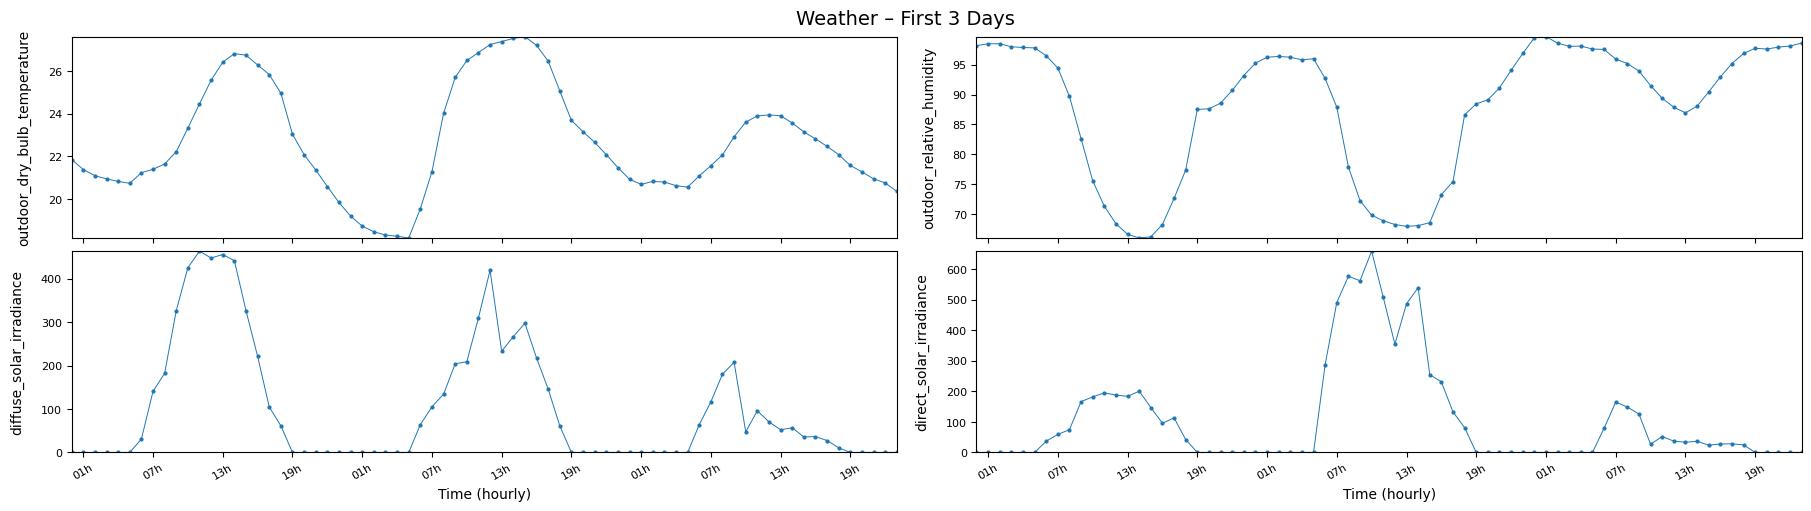

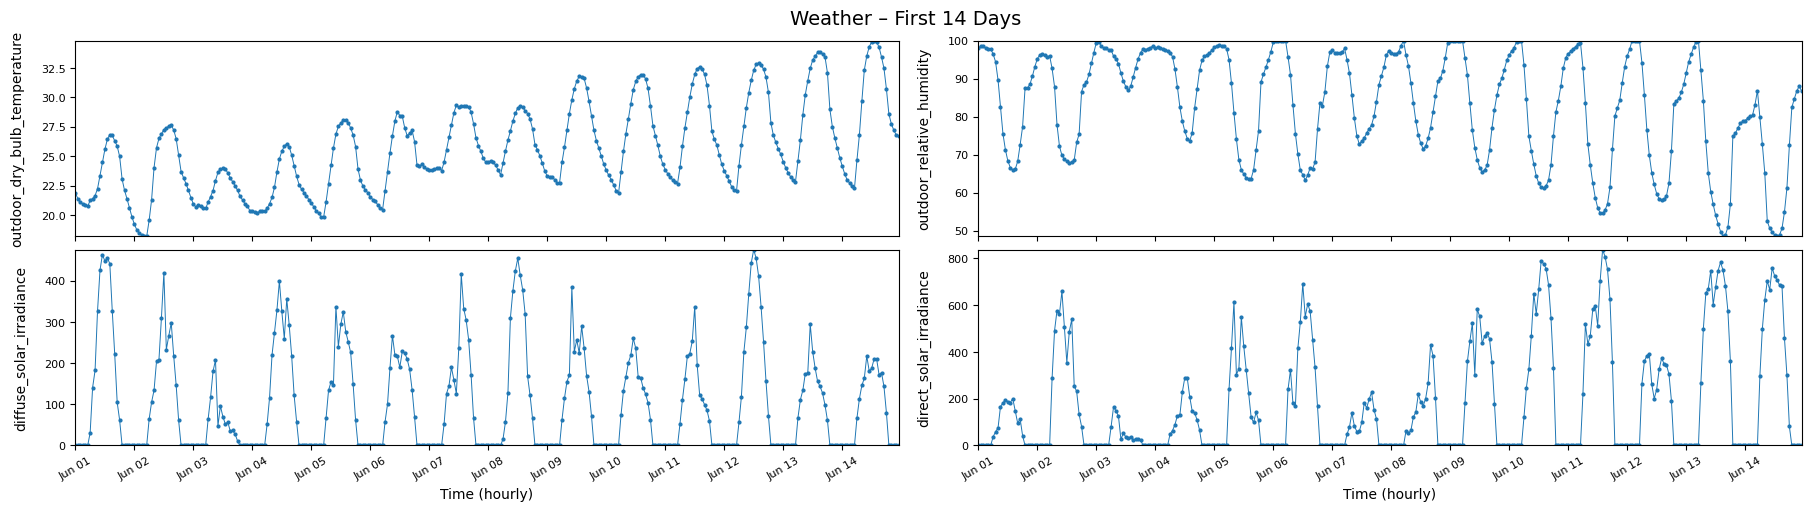

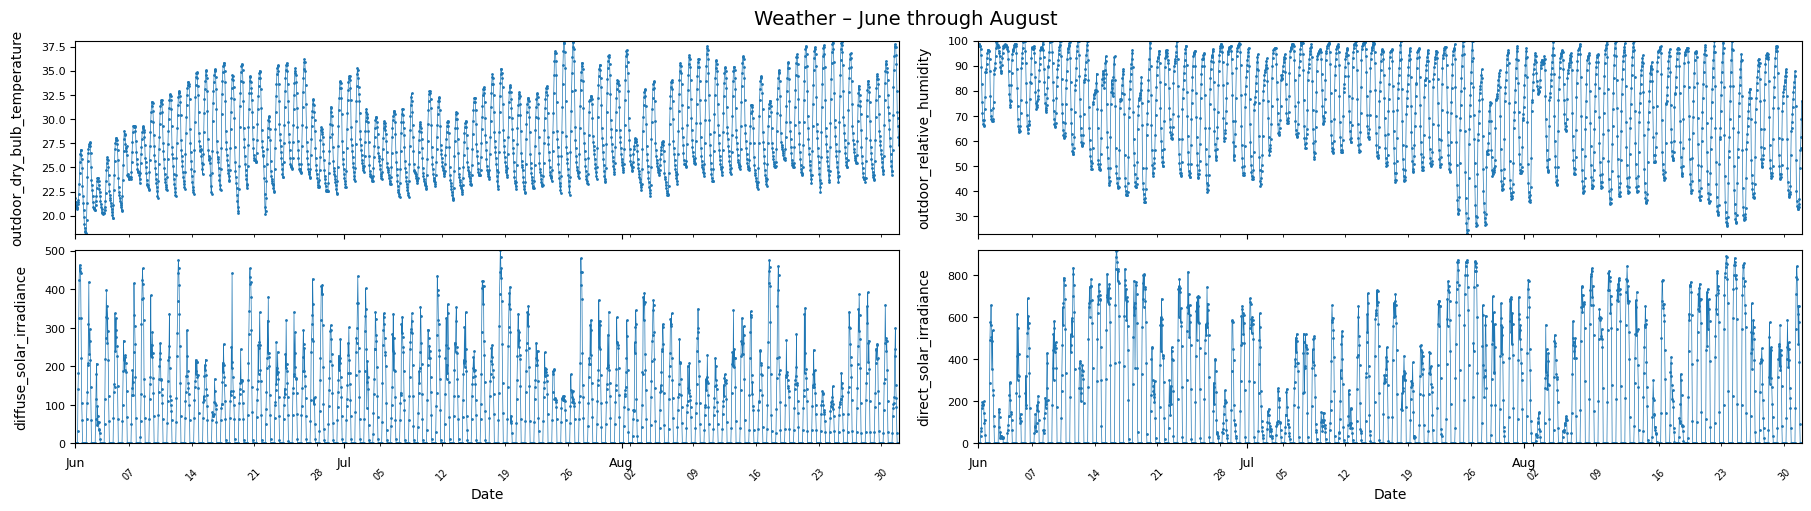

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter, DayLocator

weather_data.index = pd.date_range(
    start='2023-06-01 00:00',
    periods=len(weather_data),
    freq='H'
)

columns = [
    'outdoor_dry_bulb_temperature',
    'outdoor_relative_humidity',
    'diffuse_solar_irradiance',
    'direct_solar_irradiance'
]
hour_locator = mdates.HourLocator(interval=6)
hour_fmt     = mdates.DateFormatter('%Hh')

def plot_weather(sub_df, title, x_locator, x_fmt, xlabel_every=True): 
    """Helper: 2×2 weather plot for sub_df"""
    fig, axs = plt.subplots(2, 2, figsize=(18, 5), sharex=True, constrained_layout=True)
    for ax, col in zip(axs.flatten(), columns):
        ax.plot(sub_df.index, sub_df[col], marker='o', markersize=2, linewidth=0.7)
        ax.set_ylabel(col, fontsize=10, labelpad=12)
        ax.xaxis.set_major_locator(x_locator)
        ax.xaxis.set_major_formatter(x_fmt)
        ax.tick_params(axis='x', rotation=30, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
    if xlabel_every:
        for ax in axs[1]:
            ax.set_xlabel('Time (hourly)', fontsize=10)
    fig.suptitle(title, fontsize=14)
    plt.show()


# --- Plot 1: First 3 Days ---
plot_weather(
    weather_data.iloc[:3*24],
    title='Weather – First 3 Days',
    x_locator=hour_locator,
    x_fmt=hour_fmt
)

# --- Plot 2: First 14 Days ---
plot_weather(
    weather_data.iloc[:14*24],
    title='Weather – First 14 Days',
    x_locator=mdates.DayLocator(interval=1),
    x_fmt=DateFormatter('%b %d')
)

# --- Plot 3: Entire June–August (with monthly + weekly ticks) ---
fig, axs = plt.subplots(2, 2, figsize=(18, 5), sharex=True, constrained_layout=True)
for ax, col in zip(axs.flatten(), columns):
    ax.plot(weather_data.index, weather_data[col], marker='o', markersize=1, linewidth=0.5)
    ax.set_ylabel(col, fontsize=10, labelpad=12)
    # major = months, minor = weeks
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))
    ax.xaxis.set_minor_locator(DayLocator(interval=7))
    ax.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax.tick_params(axis='x', which='major', rotation=0, labelsize=9, pad=6)
    ax.tick_params(axis='x', which='minor', rotation=45, labelsize=7, pad=14)
    ax.tick_params(axis='y', labelsize=8)
for ax in axs[1]:
    ax.set_xlabel('Date', fontsize=10)
fig.suptitle('Weather – June through August', fontsize=14)
plt.show()

/scratch/slurm_tmpdir/job_1561869/ipykernel_3217909/262798330.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_data.index = pd.date_range(


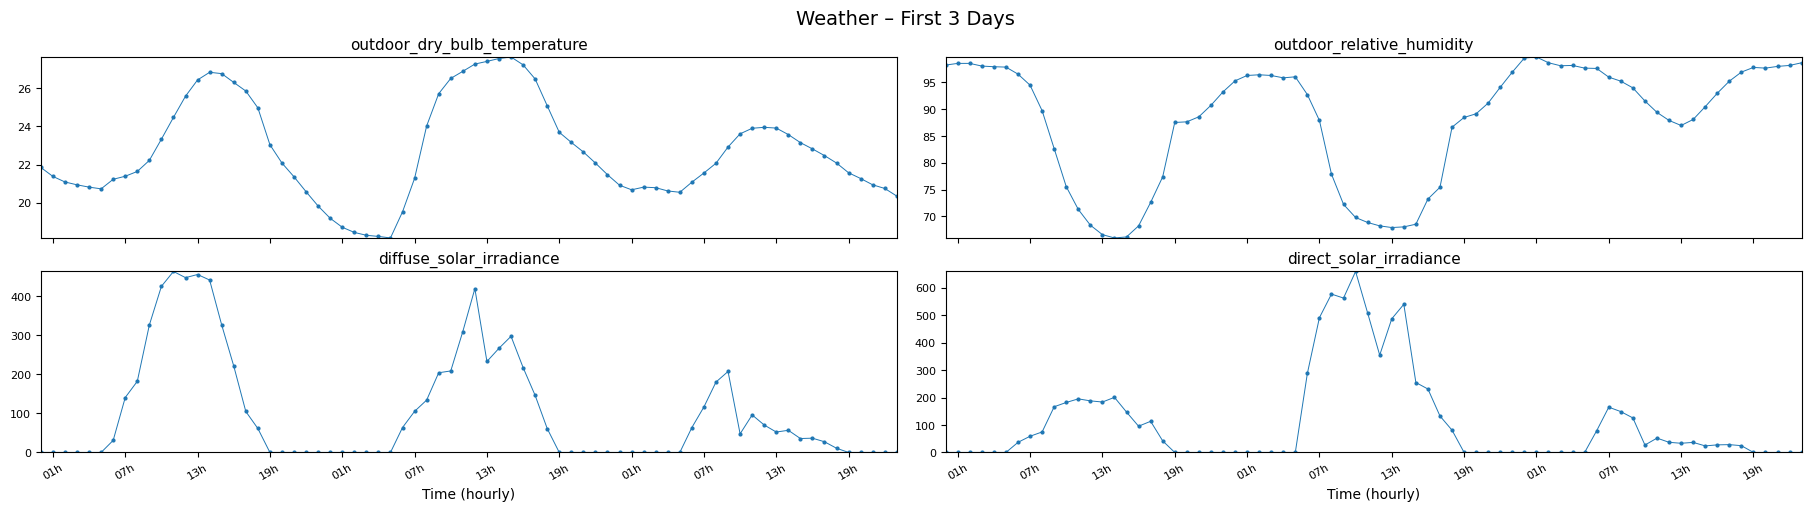

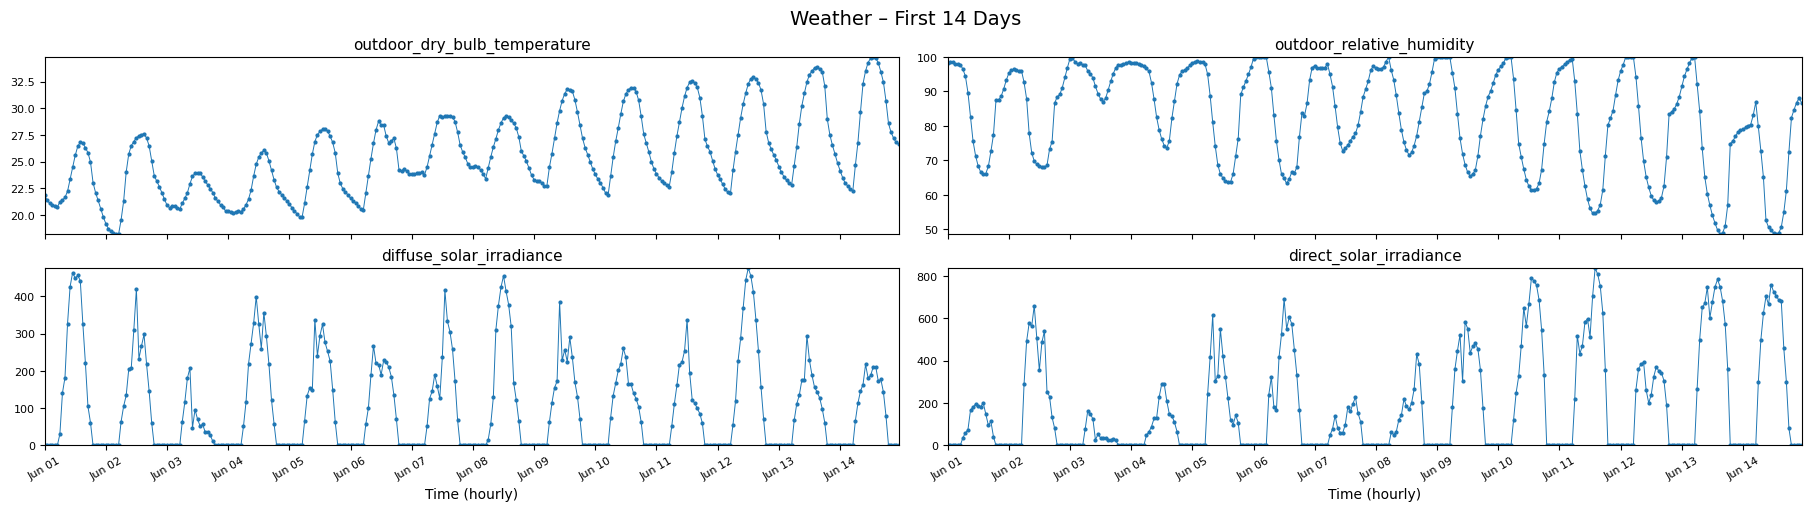

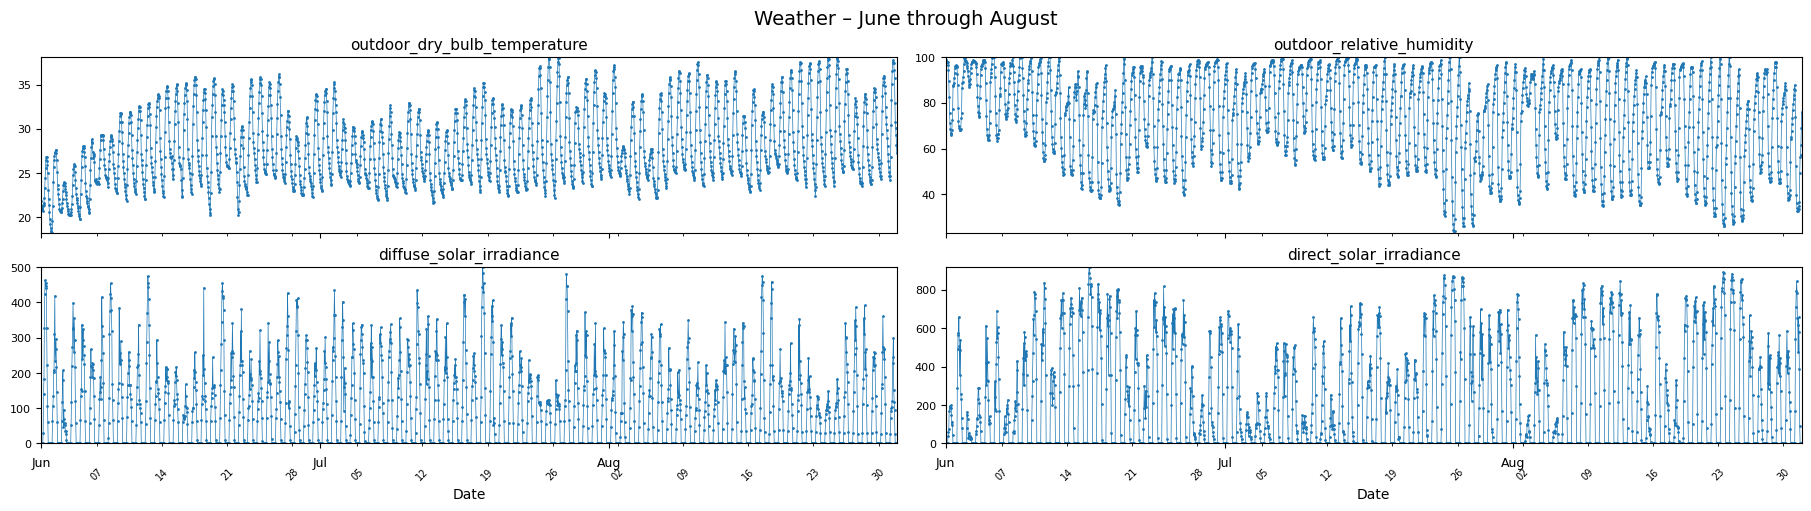

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter, DayLocator

weather_data.index = pd.date_range(
    start='2023-06-01 00:00',
    periods=len(weather_data),
    freq='H'
)

columns = [
    'outdoor_dry_bulb_temperature',
    'outdoor_relative_humidity',
    'diffuse_solar_irradiance',
    'direct_solar_irradiance'
]
hour_locator = mdates.HourLocator(interval=6)
hour_fmt     = mdates.DateFormatter('%Hh')

def plot_weather(sub_df, title, x_locator, x_fmt, xlabel_every=True):
    """Helper: 2×2 weather plot für sub_df mit Titeln über den Subplots."""
    fig, axs = plt.subplots(2, 2, figsize=(18, 5), sharex=True, constrained_layout=True)
    for ax, col in zip(axs.flatten(), columns):
        ax.plot(sub_df.index, sub_df[col], marker='o', markersize=2, linewidth=0.7)
        ax.set_title(col, fontsize=11, pad=6)     
        ax.xaxis.set_major_locator(x_locator)
        ax.xaxis.set_major_formatter(x_fmt)
        ax.tick_params(axis='x', rotation=30, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
    if xlabel_every:
        for ax in axs[1]:
            ax.set_xlabel('Time (hourly)', fontsize=10)
    fig.suptitle(title, fontsize=14)
    plt.show()

# --- Plot 1: First 3 days ---
plot_weather(
    weather_data.iloc[:3*24],
    title='Weather – First 3 Days',
    x_locator=hour_locator,
    x_fmt=hour_fmt
)

# --- Plot 2: First 14 Days ---
plot_weather(
    weather_data.iloc[:14*24],
    title='Weather – First 14 Days',
    x_locator=mdates.DayLocator(interval=1),
    x_fmt=DateFormatter('%b %d')
)

# --- Plot 3: Entire Time Period (Months as Major, Weeks as Minor) ---
fig, axs = plt.subplots(2, 2, figsize=(18, 5), sharex=True, constrained_layout=True)
for ax, col in zip(axs.flatten(), columns):
    ax.plot(weather_data.index, weather_data[col], marker='o', markersize=1, linewidth=0.5)
    ax.set_title(col, fontsize=11, pad=6)        
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))
    ax.xaxis.set_minor_locator(DayLocator(interval=7))
    ax.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax.tick_params(axis='x', which='major', rotation=0, labelsize=9, pad=6)
    ax.tick_params(axis='x', which='minor', rotation=45, labelsize=7, pad=14)
    ax.tick_params(axis='y', labelsize=8)

for ax in axs[1]:
    ax.set_xlabel('Date', fontsize=10)

fig.suptitle('Weather – June through August', fontsize=14)
plt.show()

In [15]:
# Pricing (simple)
filename = schema['buildings'][building_name]['pricing']
filepath = os.path.join(root_directory, filename)
pricing_data = pd.read_csv(filepath)
display(pricing_data.head())
display(pricing_data.describe(include='all'))

,electricity_pricing,electricity_pricing_predicted_1,electricity_pricing_predicted_2,electricity_pricing_predicted_3
0,0.03025,0.03025,0.03025,0.03025
1,0.03025,0.03025,0.03025,0.03025
2,0.03025,0.03025,0.03025,0.03025
3,0.03025,0.03025,0.06605,0.03025
4,0.03025,0.03025,0.06605,0.03025


,electricity_pricing,electricity_pricing_predicted_1,electricity_pricing_predicted_2,electricity_pricing_predicted_3
count,2208.000000,2208.000000,2208.000000,2208.000000
mean,0.033460,0.033460,0.033460,0.033460
std,0.010231,0.010231,0.010231,0.010231
min,0.030250,0.030250,0.030250,0.030250
25%,0.030250,0.030250,0.030250,0.030250
50%,0.030250,0.030250,0.030250,0.030250
75%,0.030250,0.030250,0.030250,0.030250
max,0.066050,0.066050,0.066050,0.066050


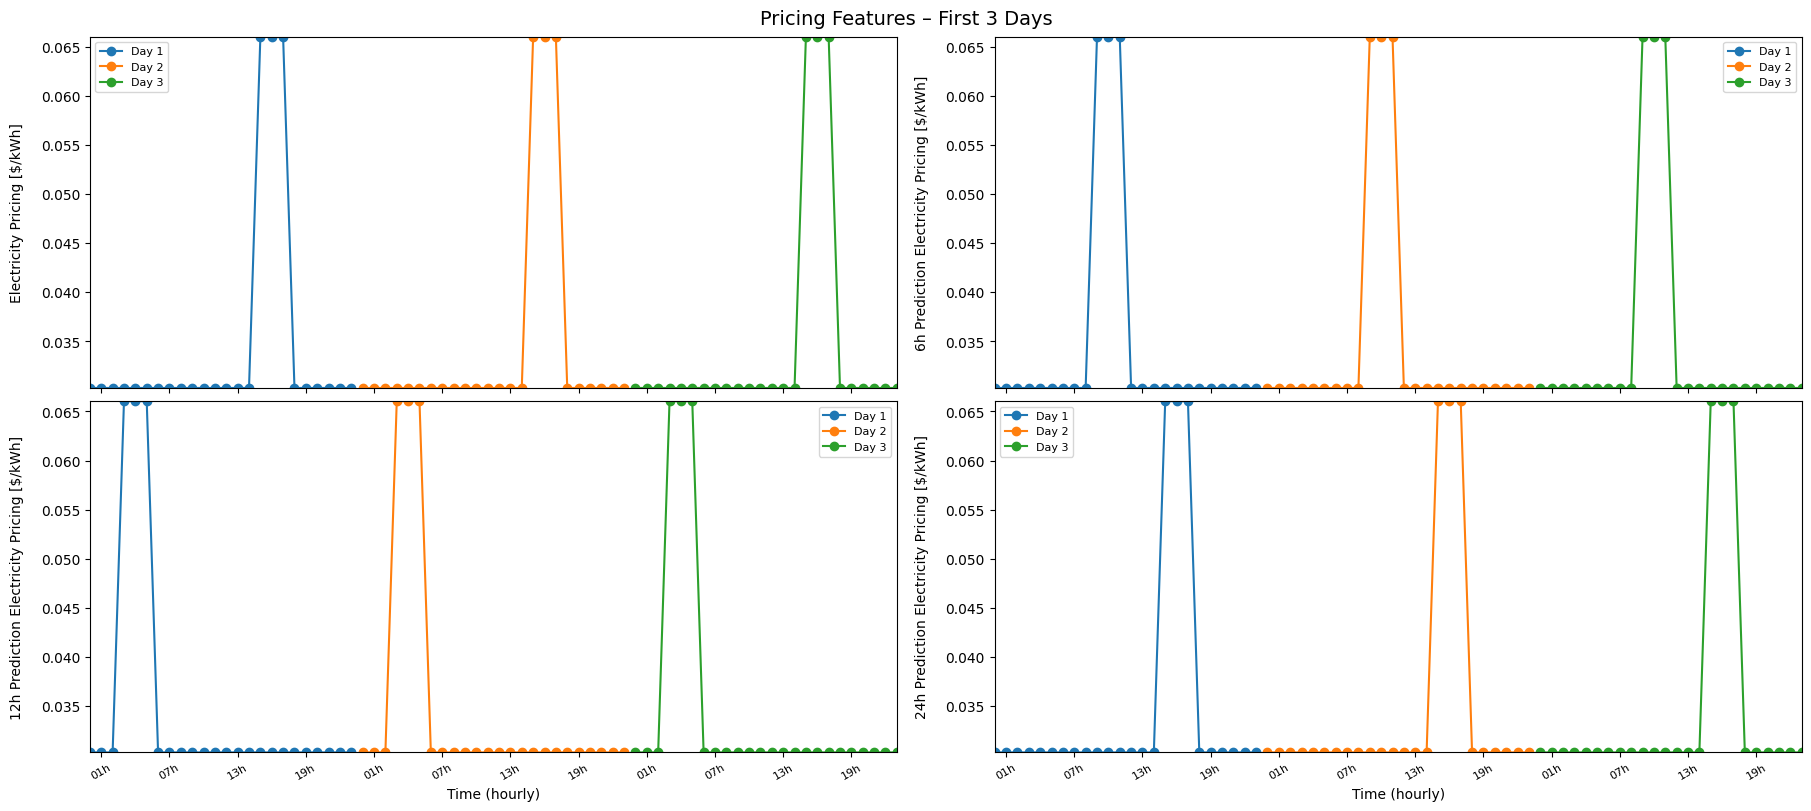

In [9]:
pricing_data.index = pd.date_range(start='2023-06-01 00:00', periods=len(pricing_data), freq='H')
first_3days   = pricing_data.iloc[:24 * 3]
day_slices    = [first_3days.iloc[i*24:(i+1)*24] for i in range(3)]
features      = first_3days.columns.tolist()

fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True, constrained_layout=True)

for ax, feat in zip(axs.flatten(), features):
    for i, day in enumerate(day_slices):
        ax.plot(day.index, day[feat], marker='o', label=f'Day {i+1}')
    ax.set_ylabel(feat, labelpad=12)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Hh'))
    ax.tick_params(axis='x', rotation=30, labelsize=8)
    ax.legend(fontsize=8)

fig.suptitle('Pricing Features – First 3 Days', fontsize=14)
for ax in axs[1]:
    ax.set_xlabel('Time (hourly)')
plt.show()

/scratch/slurm_tmpdir/job_1561869/ipykernel_3217909/86587683.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pricing_data.index = pd.date_range(


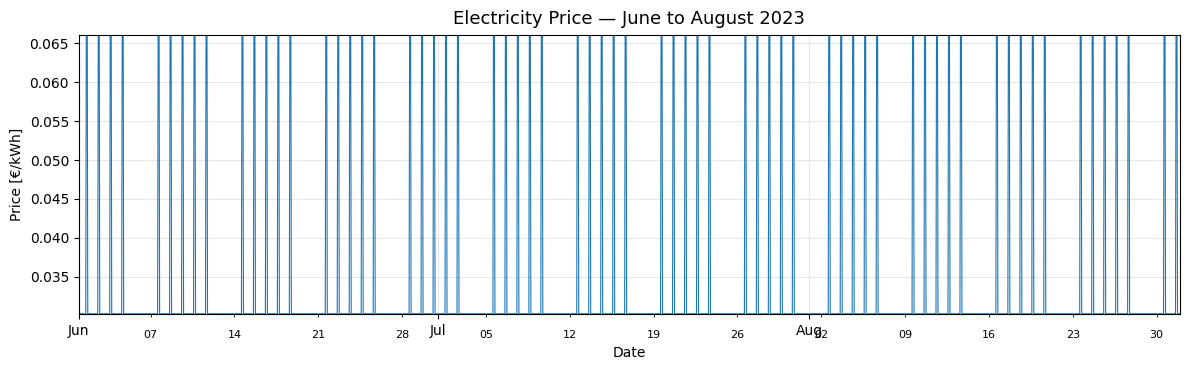

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure hourly datetime index for June–August 2023
pricing_data.index = pd.date_range(
    start='2023-06-01 00:00',
    periods=len(pricing_data),
    freq='H'
)

price_col = next(
    (c for c in ['electricity_pricing', 'price', 'tariff', 'Price', 'pricing'] if c in pricing_data.columns),
    None
)
if price_col is None:
    raise KeyError(f"No price column found in {pricing_data.columns.tolist()}")

start, end = pd.Timestamp('2023-06-01'), pd.Timestamp('2023-08-31 23:00')
price = pricing_data.loc[start:end, price_col]

# Plot
fig, ax = plt.subplots(figsize=(12, 3.8))
ax.plot(price.index, price.values, linewidth=0.8)
ax.set_title('Electricity Price — June to August 2023', fontsize=13, pad=8)
ax.set_ylabel('Price [€/kWh]')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax.tick_params(axis='x', which='major', labelsize=10)
ax.tick_params(axis='x', which='minor', labelsize=8, rotation=0, pad=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# Carbon Intensity
filename = schema['buildings'][building_name]['carbon_intensity']
filepath = os.path.join(root_directory, filename)
carbon_intensity_data = pd.read_csv(filepath)
display(carbon_intensity_data.head())
display(carbon_intensity_data.describe(include='all').T)

,carbon_intensity
0,0.470113
1,0.467053
2,0.457809
3,0.457264
4,0.461049


,count,mean,std,min,25%,50%,75%,max
carbon_intensity,2208.0,0.438969,0.054517,0.270066,0.397706,0.451167,0.479876,0.563472


/scratch/slurm_tmpdir/job_1561869/ipykernel_3217909/1941952554.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  carbon_intensity_data.index = pd.date_range(


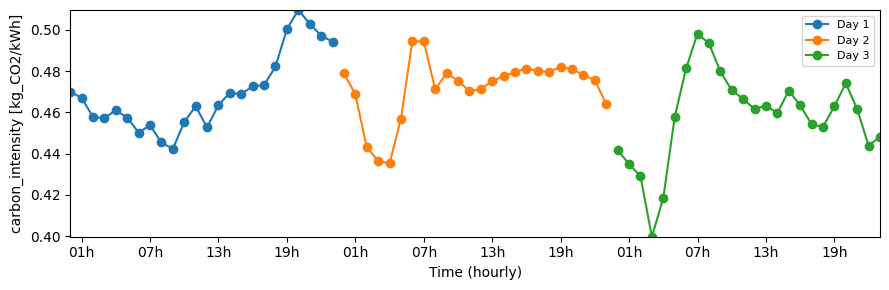

In [26]:
carbon_intensity_data.index = pd.date_range(
    start='2023-06-01 00:00',
    periods=len(carbon_intensity_data),
    freq='H'
)
first_3days_co2 = carbon_intensity_data.iloc[:24 * 3]
day_slices_co2 = [first_3days_co2.iloc[i*24:(i+1)*24] for i in range(3)]

fig, ax = plt.subplots(figsize=(9, 3))
for i, day in enumerate(day_slices_co2):
    ax.plot(day.index, day['carbon_intensity'], marker='o', label=f'Day {i+1}')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Hh'))
ax.set_xlabel('Time (hourly)')
ax.set_ylabel('carbon_intensity [kg_CO2/kWh]')
ax.legend(fontsize=8)
plt.tight_layout()
plt.show()
# mid day CO2 emissions are lower than at night/morning, probably due to solar generation

/scratch/slurm_tmpdir/job_1561869/ipykernel_3217909/720769678.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  carbon_intensity_data.index = pd.date_range(


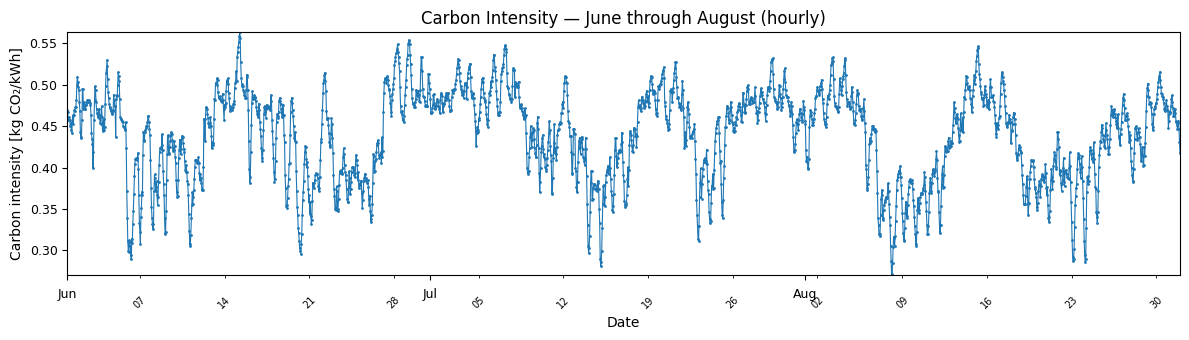

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DayLocator, DateFormatter
import pandas as pd

carbon_intensity_data.index = pd.date_range(
    start='2023-06-01 00:00',
    periods=len(carbon_intensity_data),
    freq='H'
)

# Plot: full June–August horizon
fig, ax = plt.subplots(figsize=(12, 3.5))
ax.plot(
    carbon_intensity_data.index,
    carbon_intensity_data['carbon_intensity'],
    linewidth=0.8, marker='o', markersize=1
)
ax.set_title('Carbon Intensity — June through August (hourly)', fontsize=12, pad=6)
ax.set_ylabel('Carbon intensity [kg CO₂/kWh]', fontsize=10)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
ax.xaxis.set_minor_locator(DayLocator(interval=7))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.tick_params(axis='x', which='major', rotation=0, labelsize=9, pad=6)
ax.tick_params(axis='x', which='minor', rotation=45, labelsize=7, pad=12)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Date', fontsize=10)
plt.tight_layout()
plt.show()

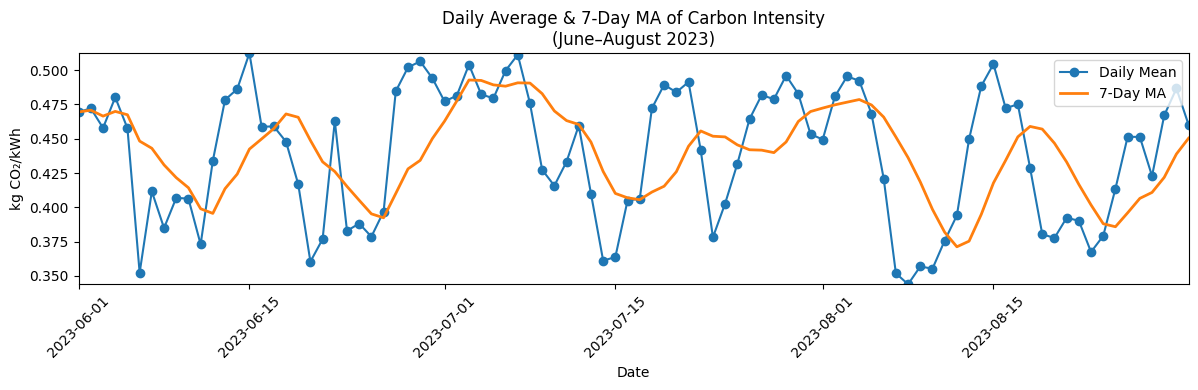

In [12]:
carbon_intensity_data.index = pd.date_range(
    start='2023-06-01 00:00',
    periods=len(carbon_intensity_data),
    freq='H'
)

daily_mean = carbon_intensity_data.resample('D').mean()

rolling7 = daily_mean.rolling(window=7, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(daily_mean.index, daily_mean['kg_CO2/kWh'], marker='o', label='Daily Mean')
ax.plot(rolling7.index,    rolling7['kg_CO2/kWh'], linestyle='-', linewidth=2, label='7-Day MA')
ax.set_xlabel('Date')
ax.set_ylabel('kg CO₂/kWh')
ax.set_title('Daily Average & 7-Day MA of Carbon Intensity\n(June–August 2023)')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

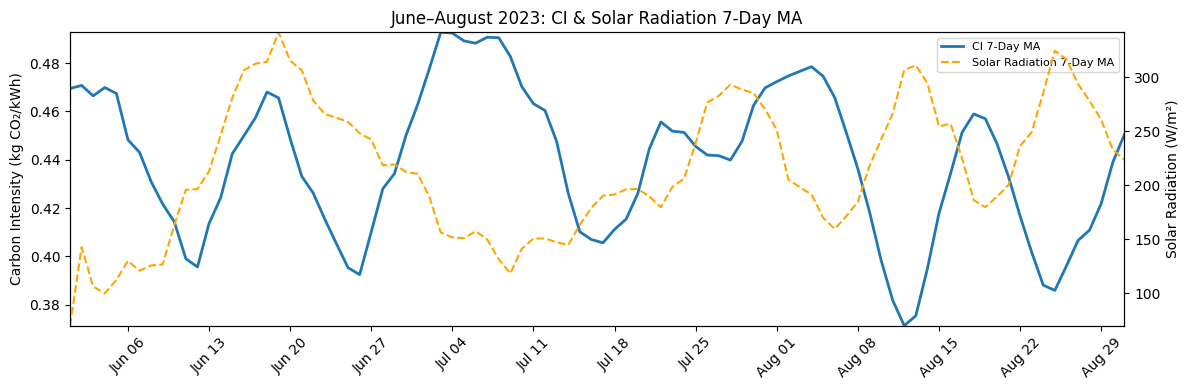

Pearson r = -0.46


<Axes: xlabel='Direct Solar Radiation (W/m2)', ylabel='kg_CO2/kWh'>

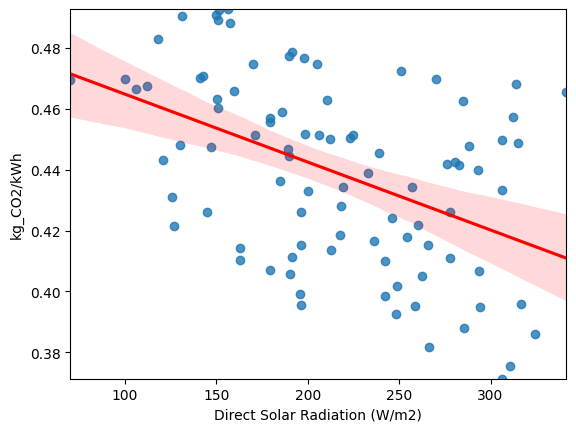

In [13]:
# Carbon Intensity & Solar Radiation
weather_data.index = pd.date_range(start='2023-06-01 00:00', periods=len(weather_data), freq='H')
carbon_intensity_data.index = pd.date_range(start='2023-06-01 00:00', periods=len(carbon_intensity_data), freq='H')

weather_daily = weather_data.resample('D').mean()
carbon_daily  = carbon_intensity_data.resample('D').mean()

carbon_roll7 = carbon_daily['kg_CO2/kWh'].rolling(window=7, min_periods=1).mean()
solar_roll7  = weather_daily['Direct Solar Radiation (W/m2)'].rolling(window=7, min_periods=1).mean()

fig, ax1 = plt.subplots(figsize=(12, 4))

#ax1.plot(carbon_daily.index, carbon_daily['kg_CO2/kWh'], marker='o', label='CI Daily Mean') # daily mean
ax1.plot(carbon_roll7.index, carbon_roll7, linewidth=2, label='CI 7-Day MA') # 7 day moving average
ax1.set_ylabel('Carbon Intensity (kg CO₂/kWh)')

ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
#ax2.plot(weather_daily.index, weather_daily['Direct Solar Radiation (W/m2)'], marker='s', color='orange', label='Solar Radiation Daily Mean') # daily mean
ax2.plot(solar_roll7.index,  solar_roll7,        linestyle='--', color='orange', label='Solar Radiation 7-Day MA') # 7 day moving average
ax2.set_ylabel('Solar Radiation (W/m²)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper right', fontsize=8)

plt.title('June–August 2023: CI & Solar Radiation 7-Day MA')
plt.tight_layout()
plt.show()
corr = solar_roll7.corr(carbon_roll7)
print(f'Pearson r = {corr:.2f}')
# moderate negative correlation between your 7-day MA of solar radiation and carbon intensity
# r=–0.46 means only about 21 % (r²≈0.21) of the day-to-day variance in carbon intensity is 
# linearly explained by solar alone.
sns.regplot(x=solar_roll7, y=carbon_roll7, line_kws={'color':'red'})


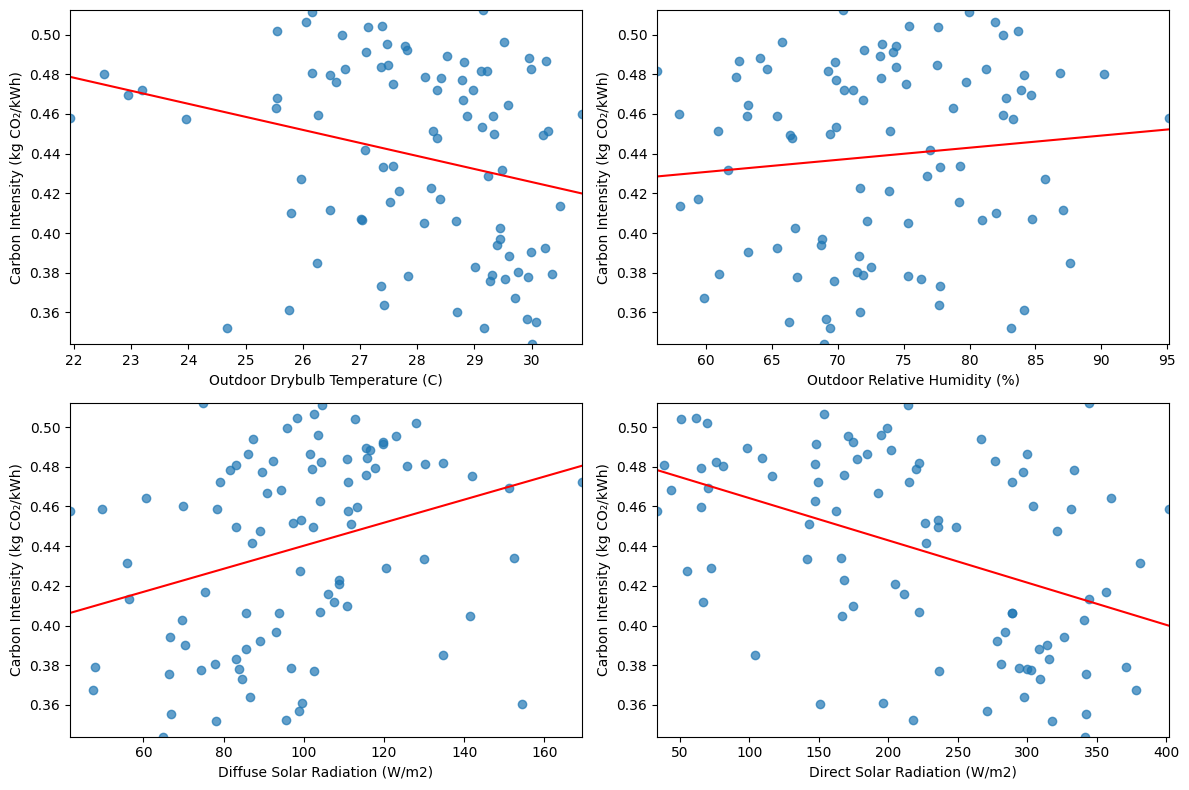

In [14]:
weather_daily = weather_data.resample('D').mean()
carbon_daily = carbon_intensity_data.resample('D').mean()

factors = [
    'Outdoor Drybulb Temperature (C)',
    'Outdoor Relative Humidity (%)',
    'Diffuse Solar Radiation (W/m2)',
    'Direct Solar Radiation (W/m2)'
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, factors):
    x = weather_daily[col]
    y = carbon_daily['kg_CO2/kWh']
    ax.scatter(x, y, alpha=0.7)
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    ax.plot(xs, m*xs + b, color='red')
    ax.set_xlabel(col)
    ax.set_ylabel('Carbon Intensity (kg CO₂/kWh)')

plt.tight_layout()
plt.show()

- **Outdoor Drybulb Temperatue:** Warmer hours often coincide with higher solar generation on the grid, which displaces fossil-fired generation and thus lowers the average carbon intensity.
- **Diffuse radiation** often peaks under partly cloudy conditions. Clouds can temporarily reduce overall solar output even though diffuse is high, so the grid leans on fossil generators, increasing carbon intensity when diffuse is high.
- Strong **direct radiation** corresponds to clear, sunny conditions with maximum solar generation feeding the grid. That displaces dirtier generation the most, so carbon intensity drops when direct solar is high.

Other Influence Factors
- **Total Demand level:** When overall system demand is high, the grid uses higher-emitting power plant, which raises carbon intensity
- **Other renewable energy sources:** wind, hydro and other sources replace fossil generation. More renewable percentage leads to lower carbon intensity
- **Time Of Day:** peak hours lead to higher carbon intensity due to fossil generation being used to satisfy demand

/scratch/slurm_tmpdir/job_1561869/ipykernel_3217909/2550193278.py:42: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range(start=start, periods=n, freq="H")


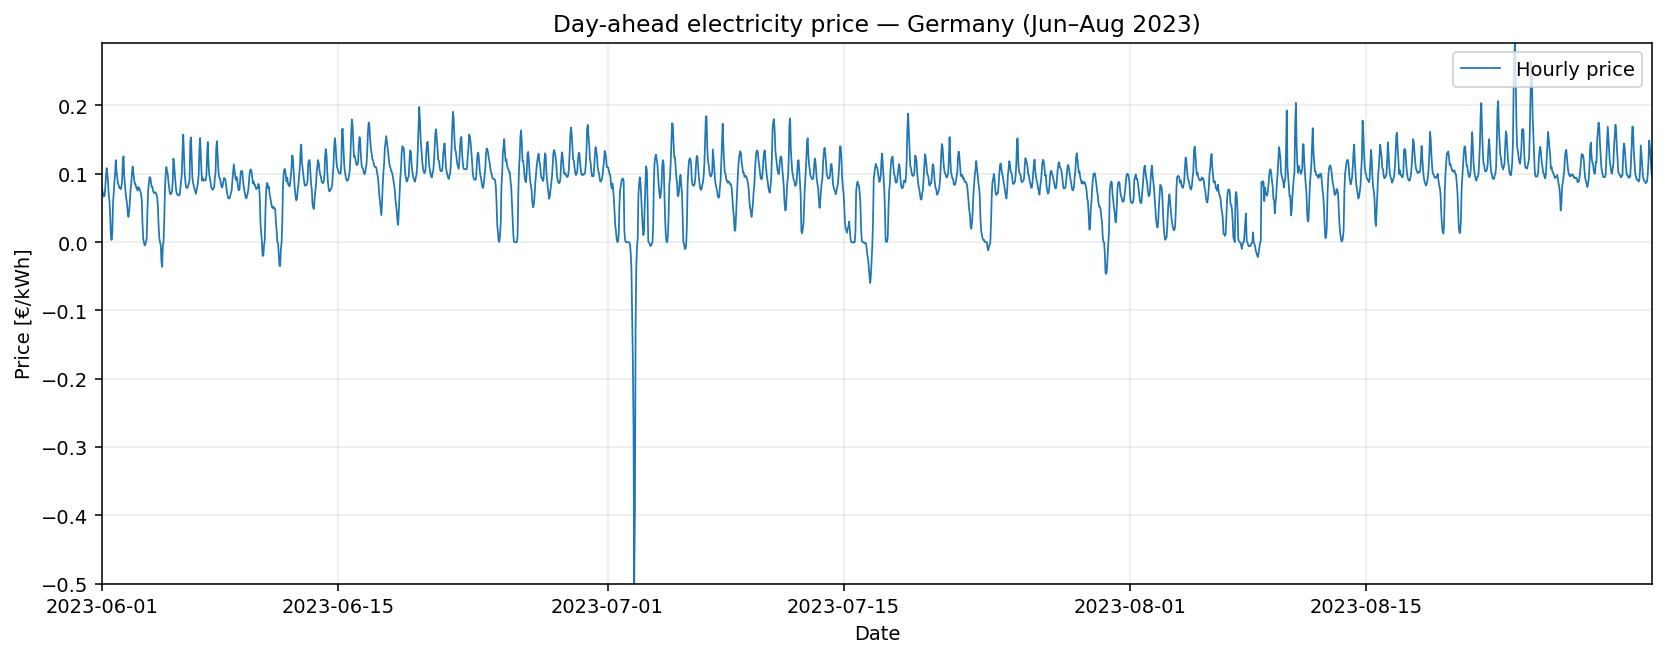

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
ROOT_DIR = r'/hkfs/home/haicore/iai/cj9272/Bachelorthesis_DQN_Agent/data/datasets/citylearn_challenge_2023_phase_3_1'
csv_path = os.path.join(ROOT_DIR, "pricing_germany_2023_june_to_august.csv")
CSV_PATH = Path(csv_path)

with open(CSV_PATH, "r", encoding="utf-8") as f:
    first_line = f.readline()
sep = ";" if first_line.count(";") > first_line.count(",") else ","

df_raw = pd.read_csv(CSV_PATH, sep=sep)

if df_raw.shape[1] == 1:
    df_raw.columns = ["price"]

price_col = "electricity_price"
for c in df_raw.columns:
    s = df_raw[c]
    if s.dtype == object:
        s = (s.astype(str)
               .str.replace(",", ".", regex=False)
               .str.replace(r"[^\d\.\-eE]", "", regex=True)
               .replace("", np.nan))
    s = pd.to_numeric(s, errors="coerce")
    if s.notna().sum() > 0:        
        price_col = c
        price = s.astype(float).reset_index(drop=True)
        break

if price_col is None:
    raise ValueError("Keine numerische Spalte gefunden. Bitte CSV prüfen.")

n = len(price)
start = pd.Timestamp("2023-06-01 00:00", tz=None)  
idx = pd.date_range(start=start, periods=n, freq="H")

df = pd.DataFrame({"price": price.values}, index=idx).dropna()

expected = 24 * 92  
if abs(len(df) - expected) > 5:  
    print(f"[Warnung] Unerwartete Länge: {len(df)} Zeilen (erwartet ~{expected}).")

df = df.loc["2023-06-01":"2023-08-31 23:00"]

roll24 = df["price"].rolling(24, min_periods=1).mean()

# Plot
plt.figure(figsize=(12, 4.8), dpi=140)
plt.plot(df.index, df["price"], linewidth=0.9, label="Hourly price")
plt.title("Day-ahead electricity price — Germany (Jun–Aug 2023)")
plt.xlabel("Date")
plt.ylabel("Price [€/kWh]")
plt.grid(True, alpha=0.25)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()